In [2]:
from pygimli.physics import ert

In [3]:
filename = "Luneplate231120_3cables.txt"
data = ert.load(filename)
print(data)

21/11/23 - 14:38:57 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
21/11/23 - 14:38:57 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns


-------------------------------------------------------------------------------



Data: Sensors: 61 data: 815, nonzero entries: ['A(adr)', 'B(adr)', 'Channel', 'DPID', 'Latitude', 'Longitude', 'M(adr)', 'MeasID', 'N(adr)', 'Pint(V)', 'T_int(deg_C)', 'Uout(V)', 'a', 'b', 'err', 'i', 'm', 'n', 'r', 'rhoa', 'stacks', 'u', 'valid']


In [4]:
if 0:
    ert.generateDataPDF(data, filename[:-4]+"-data.pdf")

Data: Sensors: 61 data: 813, nonzero entries: ['A(adr)', 'B(adr)', 'Channel', 'DPID', 'Latitude', 'Longitude', 'M(adr)', 'MeasID', 'N(adr)', 'Pint(V)', 'T_int(deg_C)', 'Uout(V)', 'a', 'b', 'err', 'i', 'm', 'n', 'r', 'rhoa', 'stacks', 'u', 'valid']


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2f6af7cca60>)

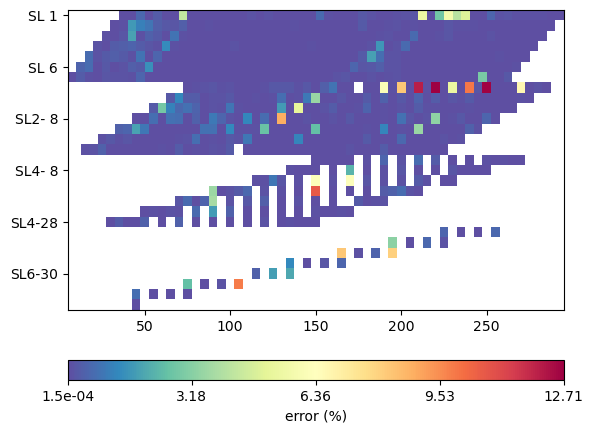

In [6]:
data.remove(data["err"] > 0.2)
print(data)
data.show(data["err"]*100, logScale=False, label="error (%)")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2f6b1061610>)

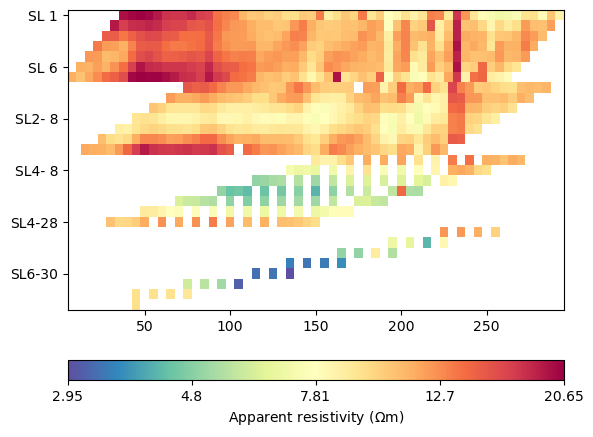

In [9]:
data.remove(data["rhoa"] > 200)
data.show()

In [10]:
data.save("luneplateP3start.dat", "a b m n rhoa k u i")

1

In [11]:
data = ert.load("luneplateP3start.dat")
print(data)

Data: Sensors: 61 data: 811, nonzero entries: ['a', 'b', 'i', 'm', 'n', 'rhoa', 'u', 'valid']


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2f6b0dd2310>)

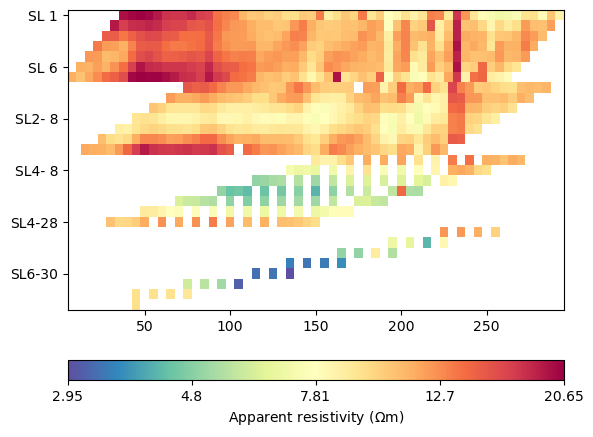

In [12]:
data.show()

21/11/23 - 14:45:46 - pyGIMLi - INFO - Cache c:\Guenther.T\src\gimli\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 1): C:\Guenther.T\Anwendungsdaten\pygimli\Cache\9912375010261899137


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2f6b175a850>)

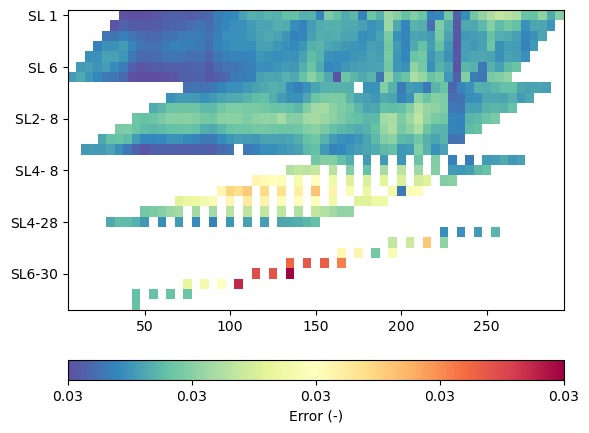

In [13]:
data.estimateError()
data.show("err")

In [26]:
mgr = ert.Manager(data)

In [16]:
mgr.invert(verbose=True)

21/11/23 - 14:47:21 - pyGIMLi - INFO - Use median(data values)=10.7027
21/11/23 - 14:47:21 - pyGIMLi - INFO - Created startmodel from forward operator: 975, min/max=10.702700/10.702700
21/11/23 - 14:47:21 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002F6B16C56D0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002F6B16C5E00>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002F6B16C5EF0>
min/max (data): 2.95/20.65
min/max (error): 3%/3.03%
min/max (start model): 10.7/10.7
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  111.88
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    7.59 (dPhi = 92.59%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    3.31 (dPhi = 51.16%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.29 (dPhi = 20.04%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.26 (dPhi = 0.58%) lam: 20.0
#############

975 [15.365953054090129,...,3.625490056176023]

array([<Axes: >, <Axes: >], dtype=object)

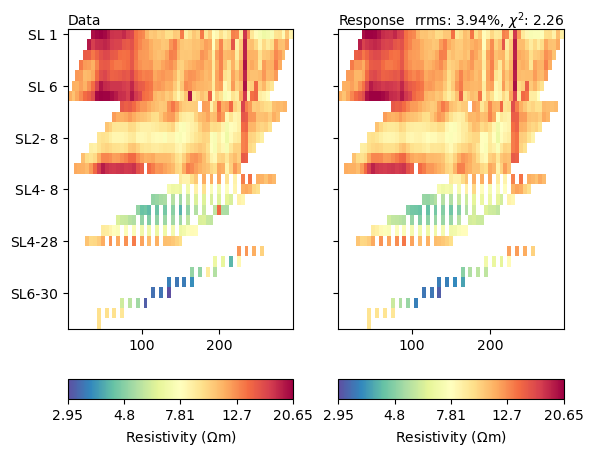

In [17]:
mgr.showFit()

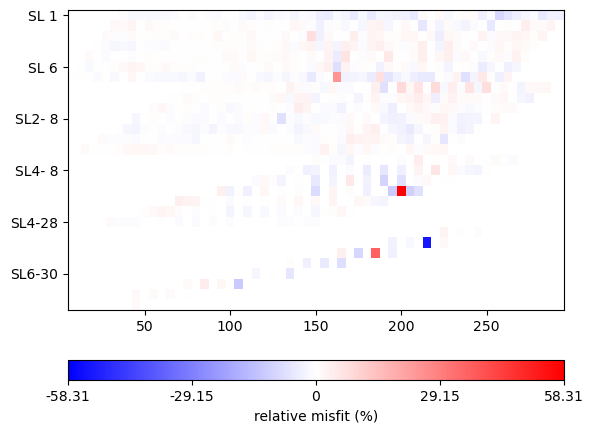

In [18]:
mgr.showMisfit()

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2f6b1493f40>)

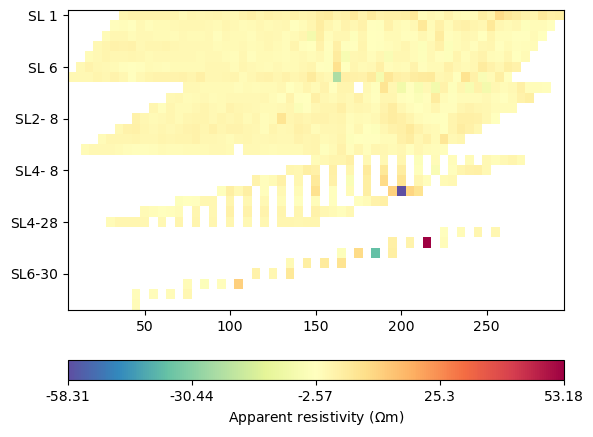

In [20]:
misfit = (mgr.inv.response / data["rhoa"] - 1) * 100
data.show(misfit)

In [24]:
import numpy as np
data.remove(np.nonzero(abs(misfit) > 20)[0])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2f6be6c5c40>)

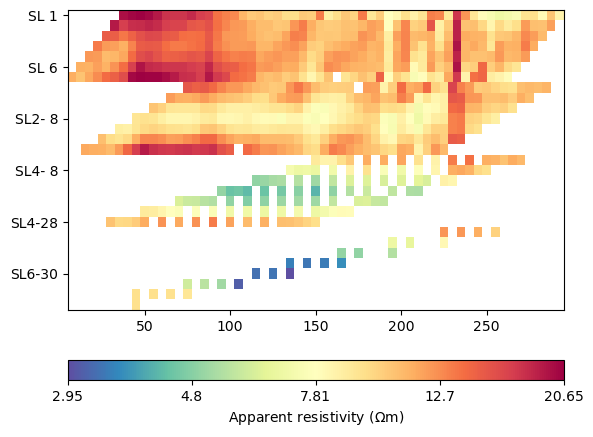

In [25]:
data.show()

In [28]:
mgr = ert.Manager(data)
mgr.invert(verbose=True)

21/11/23 - 14:54:11 - pyGIMLi - INFO - Found 2 regions.
21/11/23 - 14:54:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/11/23 - 14:54:11 - pyGIMLi - INFO - Found 2 regions.
21/11/23 - 14:54:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/11/23 - 14:54:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/11/23 - 14:54:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/11/23 - 14:54:12 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2658 Cells: 4988 Boundaries: 3904
21/11/23 - 14:54:12 - pyGIMLi - INFO - Use median(data values)=10.7027
21/11/23 - 14:54:12 - pyGIMLi - INFO - Created startmodel from forward operator: 975, min/max=10.702700/10.702700
21/11/23 - 14:54:12 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002F6BE73B180>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002F6B16C5EF0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002F6B16C57C0>
min/max (data): 2.95/20.65
min/max (error): 3%/3.03%
min/max (start model): 10.7/10.7
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  110.59
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.51 (dPhi = 94.44%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.36 (dPhi = 67.49%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    0.47 (dPhi = 37.92%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.47)      

975 [11.633714311224411,...,2.471351786811007]

array([<Axes: >, <Axes: >], dtype=object)

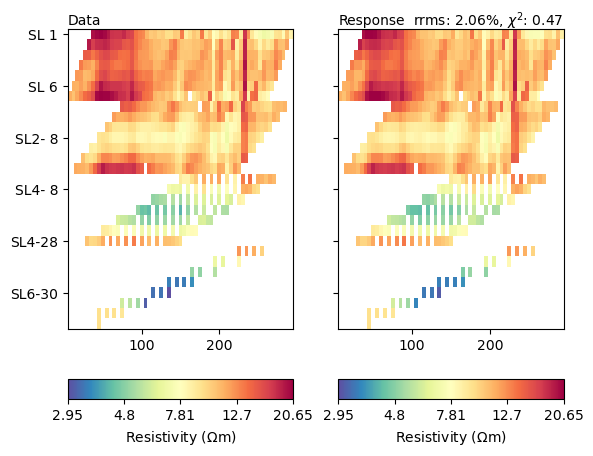

In [30]:
mgr.showFit()

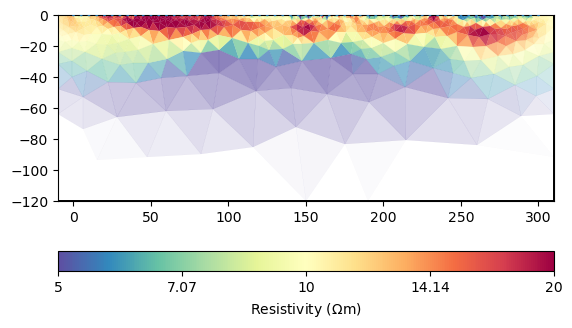

In [33]:
ax, cb = mgr.showResult(cMin=5, cMax=20)
ax.figure.savefig("result.pdf")

In [51]:
data.estimateError(relativeError=0.03)
mgr = ert.Manager(data)
mgr.invert(paraDX=0.25, zWeight=0.3, quality=34.4, verbose=True)

21/11/23 - 15:07:32 - pyGIMLi - INFO - Found 2 regions.
21/11/23 - 15:07:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/11/23 - 15:07:32 - pyGIMLi - INFO - Found 2 regions.
21/11/23 - 15:07:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/11/23 - 15:07:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/11/23 - 15:07:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/11/23 - 15:07:32 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 6456 Cells: 12396 Boundaries: 9554
21/11/23 - 15:07:32 - pyGIMLi - INFO - Use median(data values)=10.7027
21/11/23 - 15:07:32 - pyGIMLi - INFO - Created startmodel from forward operator: 2159, min/max=10.702700/10.702700
21/11/23 - 15:07:32 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002F6DD025450>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002F6DD025590>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002F6DD05F340>
min/max (data): 2.95/20.65
min/max (error): 3%/3.03%
min/max (start model): 10.7/10.7
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  110.59
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.62 (dPhi = 94.70%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.65 (dPhi = 68.34%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    0.72 (dPhi = 49.25%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi

2159 [14.523757483456952,...,4.278856212620978]

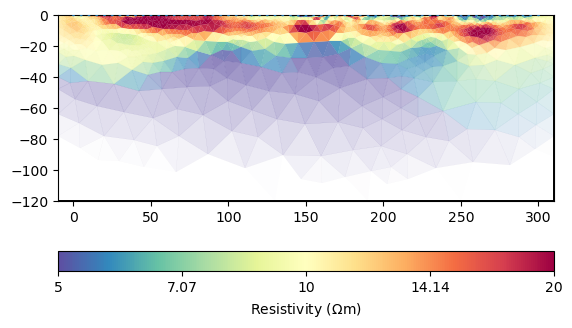

In [52]:
ax, cb = mgr.showResult(cMin=5, cMax=20)
ax.figure.savefig("result.pdf")